** 스마트워치 센서 데이터 기반 행동 분류 1일차 **
# ---------- 과제2 : 행동분류 Feature 분석 ----------

### [미션0] 과제 이해하기
   * 이전 과제1 에서는 센서에서 수집한 데이터로 6가지 행동을 분류할 수 있는 AI 모델을 만들어 보았습니다.
   * 과제2 에서는 스마트워치가 6가지 행동을 분류 하는데 어떤 feature가 영향을 많이 미치는지 모델링을 통해 중요도 상/하위 feature 들을 선별하고 해당 feature의 데이터 분포를 확인해 보겠습니다.
      * data 데이터프레임에서는 'Activity'와 'subject' 열을 제외한 각 feature는 -1과 +1 사이의 실수로 되어 있는 데이터가 있습니다.
      * 6가지 행동 패턴: STANDING, SITTING, LAYING, WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS


※ 미션완수 조건: 중요도 상위 feature 5개와 하위 feature 3개를 선별하고 featuere 중요도 그래프를 그려 보세요

---

### (1) 데이터 불러오기
* pandas, numpy, matplotlib, seaborn, os 등 데이터 분석에필요한 라이브러리와 모듈을 불러오세요.
* 라이브러리가 없을땐 !pip 명령어를 통해 필요한 라이브러리를 설치 하세요.
* 현위치 하위 'data' 폴더에서 'train_data.csv' 파일 읽어 오세요.


	- 실습순서: 라이브러리 불러오기 -> 현재 디렉토리 확인 -> data 폴더 내 데이터 파일 확인 -> train_data.csv 불러오기 -> 'subject'열 제거 -> 고유값(범주) 개수 시각화

In [ ]:
# pandas, numpy, matplotlib.pyplot, seaborn, os 등 필요 라이브러리 호출
## 추가로 필요한 라이브러리는 설치/호출 하세요.

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import os

In [ ]:
# 현재 디렉토리 위치 확인
## 현재 디렉토리가 어디인지 확인 합니다.(에이블러 별 다를 수 있음)

os.getcwd()

'C:\\Users\\user\\230920_미프3차_1일차_교육생용'

In [ ]:
# data 디렉토리 파일 확인
## 현재 디렉토리의 하위 data 폴더의 파일을 확인 합니다.

os.listdir('./data/')

['features 설명.xlsx', 'features.csv', 'train_data.csv', '~$features 설명.xlsx']

In [ ]:
# 데이터셋 파일 불러오기
## data 변수에 train_data.csv 파일을 불러와서 할당해 주세요.
## train_data.csv 파일은 현재위치의 하위 data 폴더안에 있습니다.
## 변수에 할당이 잘 되었는지 확인해 주세요.

data = pd.read_csv('train_data.csv')
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.277194,-0.012389,-0.131974,-0.994046,-0.940578,-0.917337,-0.994261,-0.932830,-0.908088,-0.936219,...,-0.690363,-0.034888,-0.261437,-0.391477,-0.877612,-0.912365,0.114009,0.080146,21,SITTING
5877,0.191568,0.013328,-0.105174,-0.126969,-0.121729,-0.327480,-0.192523,-0.109923,-0.295286,0.078644,...,-0.879215,0.721718,0.623151,0.866858,-0.445660,-0.690278,0.303194,-0.044188,15,WALKING_UPSTAIRS
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,-0.886851,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,19,LAYING
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,-0.053556,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,6,WALKING_UPSTAIRS


In [ ]:
# 불필요한 열 제거
## 'subject'열 은 데이터를 수집한 사람을 구별하기 위한 데이터 입니다.
## 'subject'열을 data 데이터프레임 변수 에서 제거해 주세요.
## 'subject'열이 잘 제거 되었는지 확인해 주세요.


data.drop('subject',axis=1,inplace=True)
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.277194,-0.012389,-0.131974,-0.994046,-0.940578,-0.917337,-0.994261,-0.932830,-0.908088,-0.936219,...,-0.305772,-0.690363,-0.034888,-0.261437,-0.391477,-0.877612,-0.912365,0.114009,0.080146,SITTING
5877,0.191568,0.013328,-0.105174,-0.126969,-0.121729,-0.327480,-0.192523,-0.109923,-0.295286,0.078644,...,-0.622617,-0.879215,0.721718,0.623151,0.866858,-0.445660,-0.690278,0.303194,-0.044188,WALKING_UPSTAIRS
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,-0.597610,-0.886851,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,LAYING
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,0.196921,-0.053556,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,WALKING_UPSTAIRS


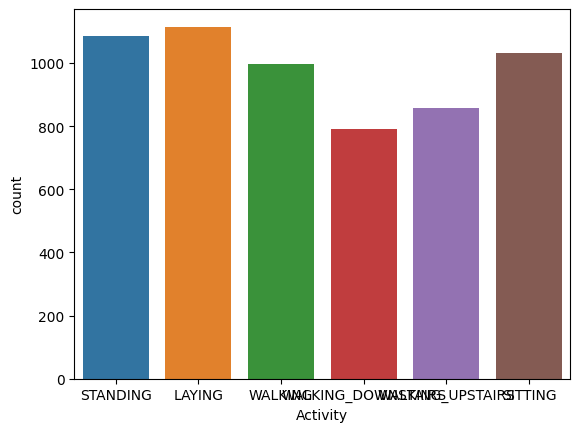

In [ ]:
# 고유값(범주) 개수 시각화
## seaborn 라이브러리의 countplot 함수을 사용하여 data['Activity'] 열의 고유값(범주) 별 개수를 시각화 합니다.


sns.countplot(x=data['Activity'])
plt.show()

### [미션2] 행동패턴 예측 AI 모델링
* Random Forest 알고리즘을 사용하여 모델링을 실시 합니다.
* 학습 데이터는 data 데이터셋을 사용하고 target은  data['Activity'] 입니다.
* 모델링이 완료되면 accuracy_score,confusion_matrix,classification_report 을 출력하세요.

	- 실습순서: AI 라이브러리 불러오기 -> X, Y데이터 나누기 -> 학습 데이터 나누기 -> 모델 초기화,학습,예측 -> 모델 평가

In [ ]:
# 필요 AI 알고리즘 라이브러리 설치

!pip install scikit-learn


In [ ]:
# RandomForestClassifier 알고리즘 불러오기
## AI 모델링을 위해 sklearn.ensemble 라이브러리의 RandomForestClassifier 알고리즘 호출 합니다.
## 데이터를 나누기 위해 sklearn.model_selection 모듈의 train_test_split 함수를 호출 합니다.
## 모델 성능평가 출력을 위해 sklearn.metrics 모듈의 모든 클래스 호출 합니다.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *



In [ ]:
# X, Y 데이터 나누기
## y 변수에 target으로 사용할 data['Activity']을 할당해 주세요.
## data 에서 data['Activity'] 열을 뺀 나머지 x 변수에 할당해 주세요.
target = 'Activity'

x=data.drop(target,axis=1)
y=data[target]

In [ ]:
# 학습 데이터 나누기
## 학습에 필요한 x 와 y 데이터를 학습 7 : 검증 3 비율로 나누어 주세요.
## 이때 random_state 는 2023 으로 설정해 주세요.
## 데이터를 할당받을 변수명: x_train, x_val, y_train, y_val



x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=2023)


In [ ]:
# AI 모델링
# 모델 선언, 학습, 예측
## rf_model 변수에 RandomForestClassifier 함수를 사용하여 모델을 호출 및 초기화 합니다.
## 이때 random_state 는 2023 으로 설정해 주세요.
## 생성한 rf_model 모델 변수에 x_train, y_train 데이터를 대입하여 모델을 학습시킵니다.
## 학습이 완료된 모델에 x_val 데이터를 대입하여 예측결과를 도출하고 rf_pred 변수에 할당 합니다.

rf_model = RandomForestClassifier(random_state=2023)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=2023)

In [ ]:
rf_pred = rf_model.predict(x_val)

In [ ]:
# 모델 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_val,rf_pred))
print(confusion_matrix(y_val,rf_pred))
print(classification_report(y_val,rf_pred))

0.975070821529745
[[354   0   0   0   0   0]
 [  0 313  15   0   0   0]
 [  0  13 313   0   0   0]
 [  0   0   0 265   3   3]
 [  0   0   0   4 224   4]
 [  0   0   0   0   2 252]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       354
           SITTING       0.96      0.95      0.96       328
          STANDING       0.95      0.96      0.96       326
           WALKING       0.99      0.98      0.98       271
WALKING_DOWNSTAIRS       0.98      0.97      0.97       232
  WALKING_UPSTAIRS       0.97      0.99      0.98       254

          accuracy                           0.98      1765
         macro avg       0.98      0.97      0.98      1765
      weighted avg       0.98      0.98      0.98      1765



### [미션3] 변수별 중요도 추출
* importance_sort 변수를 데이터프레임 타입으로 생성합니다.
* importance_sort 변수에 importance_sort['feature_name'] 열과 importance_sort['feature_importance'] 열을 생성하고 x 데이터의 feature명과 feature의 중요도를 할당해 줍니다.
* importance_sort 데이터프레임 변수를 importance_sort['feature_importance'] 열의 값을 기준으로 내림차순으로 정렬 하세요.
* 내림차순으로 정렬이 끝난 데이터셋의 인덱스를 리셋 하세요.
* 리셋이 완료된 데이터셋을 수평막대 그래프로 시각화 하세요.




	- 실습순서: 중요도 데이터프레임 변수 생성 -> feature명 할당 -> feature 중요도 할당 -> 데이터 프레임 확인 -> 중요도 정렬 -> 인덱스 재설정 -> 인덱스 리셋 -> 중요도 별 시각화(수평막대 그래프)

* 중요도 데이터를 저장할 데이터 프레임 생성

In [ ]:
# 중요도 데이터프레임 변수 생성
## importance_sort 변수를 판다스 데이터프레임 타입으로 생성 및 초기화 합니다.

importance_sort = pd.DataFrame()

In [ ]:
# feature명 할당
## importance_sort['feature_name'] 열에 모델링에서 사용한 x 데이터셋의 feature명을 할당 합니다.

importance_sort['feature_name']= x.columns


In [ ]:
# feature 중요도 할당
# 모델링에서 사용한 모델의 feature_importances 를 importance_sort['feature_importance'] 열에 할당 합니다.
# 모델 feature_importances 확인하는 방법은 .feature_importances_ 매서드를 사용합니다.
# ex: 모델명.feature_importances_

importance_sort['feature_importance'] = rf_model.feature_importances_


In [ ]:
# 데이터 프레임 확인
# importance_sort 데이터프레임에 데이터가 제대로 할당 되었는지 확인 합니다.


importance_sort

,feature_name,feature_importance
0,tBodyAcc-mean()-X,0.000372
1,tBodyAcc-mean()-Y,0.000443
2,tBodyAcc-mean()-Z,0.000226
3,tBodyAcc-std()-X,0.008804
4,tBodyAcc-std()-Y,0.000660
...,...,...
556,"angle(tBodyGyroMean,gravityMean)",0.000501
557,"angle(tBodyGyroJerkMean,gravityMean)",0.000505
558,"angle(X,gravityMean)",0.024125
559,"angle(Y,gravityMean)",0.027023


In [ ]:
# 중요도 순으로 인덱스 재정렬
## importance_sort 데이터프레임을 importance_sort['feature_importance'] 순으로 내림차순 정열 합니다.
## 정렬 후 결과를 확인 합니다.
## 참고함수: sort_values
## 참고 파라미터: by='feature_importance', ascending=False, inplace=True


importance_sort.sort_values('feature_importance', ascending=False,inplace=True)
importance_sort

,feature_name,feature_importance
52,tGravityAcc-min()-X,0.032845
49,tGravityAcc-max()-X,0.031726
56,tGravityAcc-energy()-X,0.030540
41,tGravityAcc-mean()-Y,0.027550
559,"angle(Y,gravityMean)",0.027023
...,...,...
506,fBodyAccMag-min(),0.000095
309,"fBodyAcc-bandsEnergy()-57,64",0.000094
217,tGravityAccMag-min(),0.000081
524,fBodyBodyAccJerkMag-maxInds,0.000074


In [ ]:
# 인덱스 리셋
## importance_sort['feature_importance'] 내림차순 때문에 엉킨 데이터프레임의 인덱스를 리셋 합니다.
## 인덱스 리셋 후 결과를 확인 합니다.
## 참고함수: reset_index (위에서 부터 0 -> 아래로 갈수록 +1)
## 참고 파라미터: inplace=True, drop=True


importance_sort.reset_index(drop=True,inplace=True)


In [ ]:
importance_sort

,feature_name,feature_importance
0,tGravityAcc-min()-X,0.032845
1,tGravityAcc-max()-X,0.031726
2,tGravityAcc-energy()-X,0.030540
3,tGravityAcc-mean()-Y,0.027550
4,"angle(Y,gravityMean)",0.027023
...,...,...
556,fBodyAccMag-min(),0.000095
557,"fBodyAcc-bandsEnergy()-57,64",0.000094
558,tGravityAccMag-min(),0.000081
559,fBodyBodyAccJerkMag-maxInds,0.000074


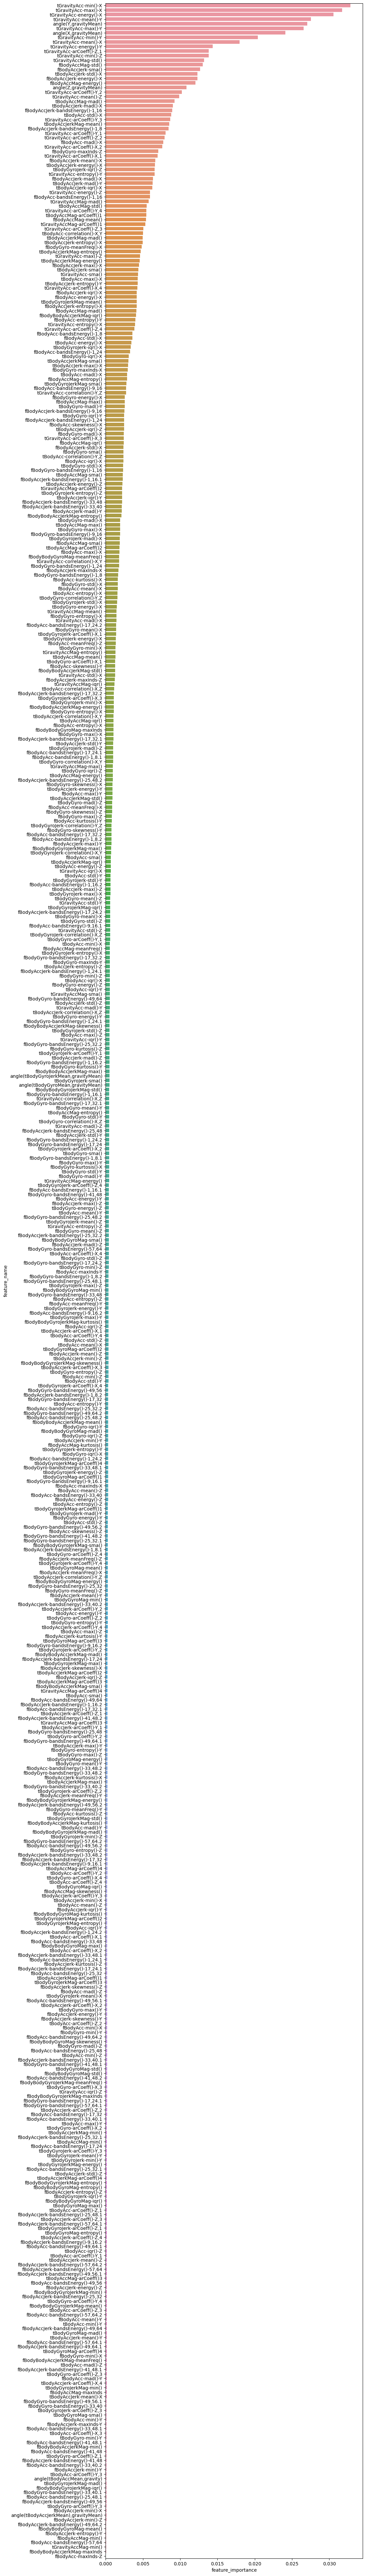

In [ ]:
# feature별 중요도 시각화
## sns.barplot을 사용하여 feature(feature) 별 중요도를 시각화 합니다.
## 그래프 사이즈: (10,100)
## 파라미터: data = importance_sort, x='feature_importance', y='feature_name'
## x축 label을 'feature_importance' 으로, y축 label 을 'feature_name' 으로 설정해 주세요.


plt.figure(figsize=(10,100))
sns.barplot(x=importance_sort['feature_importance'],y=importance_sort['feature_name'])
plt.xlabel('feature_importance')
plt.ylabel('feature_name')
plt.show()




### [미션4] 영향도 상위/하위 중요 feature 데이터 분석
* boxplot 그래프를 사용하여 행동 분류에 영향을 미치는 상위 feature 5개, 하위 feature 3개의 값의 분포를 확인해 보세요.



	- 실습순서: 중요도 변수 상위 5행 확인 -> 상위 5개 feature 시각화(boxplot 그래프) -> 하위 3개 feature 시각화(boxplot 그래프)

In [ ]:
# 중요도 상위 5개 중요 feature 확인
## head 함수를 사용하여 중요도 상위 top 5 feature의 feature_name 과 feature_importance 확인하세요.
## 행동 분류에 영향을 미치는 feature의 중요도는 importance_sort 변수를 참고 하세요.

importance_sort.head()



,feature_name,feature_importance
0,tGravityAcc-min()-X,0.032845
1,tGravityAcc-max()-X,0.031726
2,tGravityAcc-energy()-X,0.030540
3,tGravityAcc-mean()-Y,0.027550
4,"angle(Y,gravityMean)",0.027023


* 상위 5개 feature 시각화(boxplot 그래프)

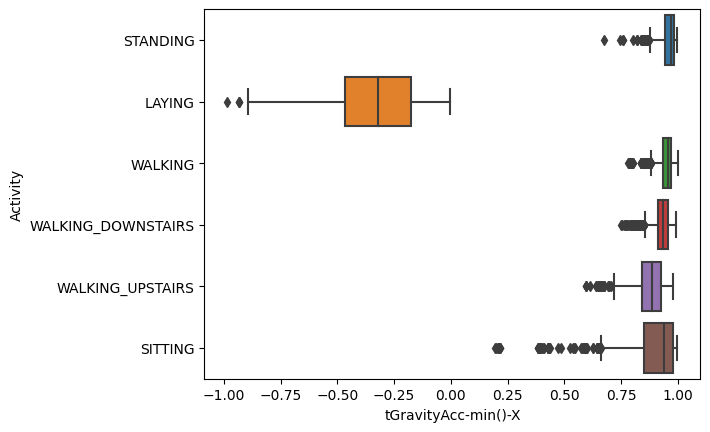

In [ ]:
# 상위 1위 feature_name에 대한 BoxPlot 그래프 그리기
## f_name 변수를 생성하여 상위 1위 feature의 컬럼명을 할당해 줍니다.
## sns.boxplot를 사용하여 data 데이터 프레임의 데이터 분포를 시각화 합니다.
## 파라미터: x=f_name, y='Activity', data=data

f_name = 'tGravityAcc-min()-X'
plt.subplot(2,1,1)
sns.boxplot(x=data[f_name], y=data['Activity'])

plt.subplot(2,1,1)
sns.kdeplot(x=f_name, hue=target, data=data)
plt.show()
plt.show()

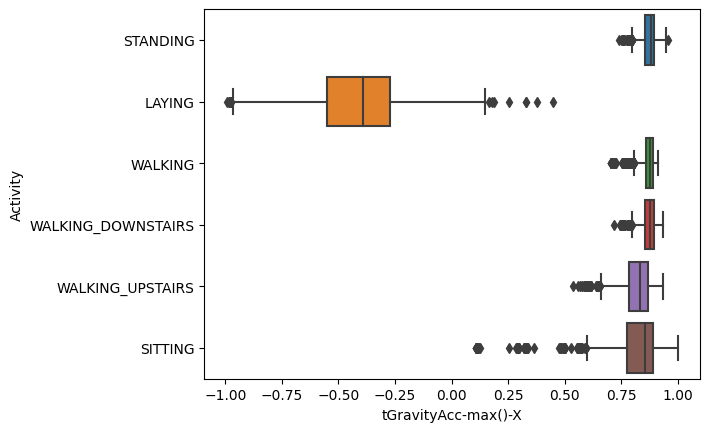

In [ ]:
# 상위 2위 feature_name에 대한 BoxPlot 그래프 그리기
## f_name 변수를 생성하여 상위 2위 feature의 컬럼명을 할당해 줍니다.
## sns.boxplot를 사용하여 data 데이터 프레임의 데이터 분포를 시각화 합니다.
## 파라미터: x=f_name, y='Activity', data=data


f_name = 'tGravityAcc-max()-X'
sns.boxplot(x=data[f_name], y=data['Activity'])
plt.show()


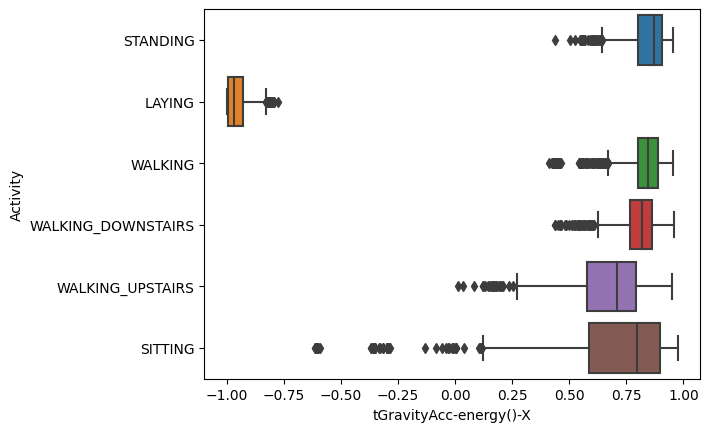

In [ ]:
# 상위 3위 feature_name에 대한 BoxPlot 그래프 그리기
## f_name 변수를 생성하여 상위 3위 feature의 컬럼명을 할당해 줍니다.
## sns.boxplot를 사용하여 data 데이터 프레임의 데이터 분포를 시각화 합니다.
## 파라미터: x=f_name, y='Activity', data=data



f_name = 'tGravityAcc-energy()-X'
sns.boxplot(x=data[f_name], y=data['Activity'])
plt.show()

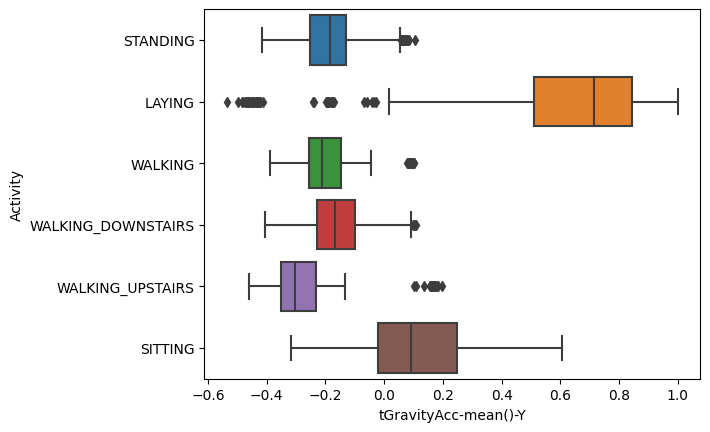

In [ ]:
# 상위 4위 feature_name에 대한 BoxPlot 그래프 그리기
## f_name 변수를 생성하여 상위 4위 feature의 컬럼명을 할당해 줍니다.
## sns.boxplot를 사용하여 data 데이터 프레임의 데이터 분포를 시각화 합니다.
## 파라미터: x=f_name, y='Activity', data=data

f_name = 'tGravityAcc-mean()-Y'
sns.boxplot(x=data[f_name], y=data['Activity'])
plt.show()

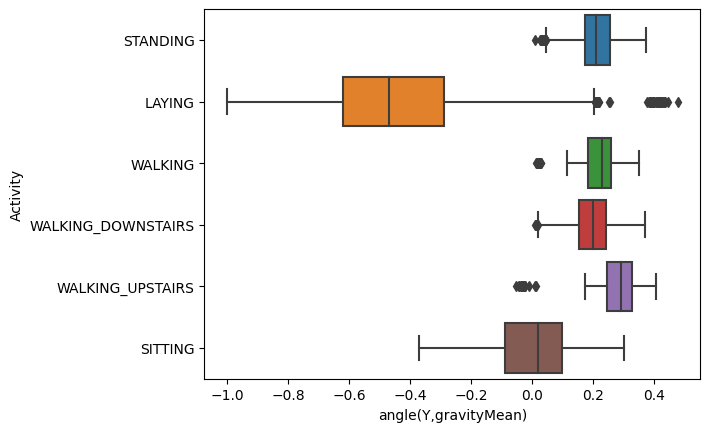

In [ ]:
# 상위 5위 feature_name에 대한 BoxPlot 그래프 그리기
## f_name 변수를 생성하여 상위 5위 feature의 컬럼명을 할당해 줍니다.
## sns.boxplot를 사용하여 data 데이터 프레임의 데이터 분포를 시각화 합니다.
## 파라미터: x=f_name, y='Activity', data=data


f_name = 'angle(Y,gravityMean)'
sns.boxplot(x=data[f_name], y=data['Activity'])
plt.show()

* 하위 3개 feature 시각화(boxplot 그래프)

In [ ]:
# 중요도 하위 3개 중요 feature 확인
## tail 함수를 사용하여 중요도 하위 3개의 feature의 feature_name 과 feature_importance 확인하세요.
## 행동 분류에 영향을 미치는 feature의 중요도는 importance_sort 변수를 참고 하세요.

importance_sort.tail(3)



,feature_name,feature_importance
558,tGravityAccMag-min(),0.000081
559,fBodyBodyAccJerkMag-maxInds,0.000074
560,fBodyAcc-maxInds-Z,0.000040


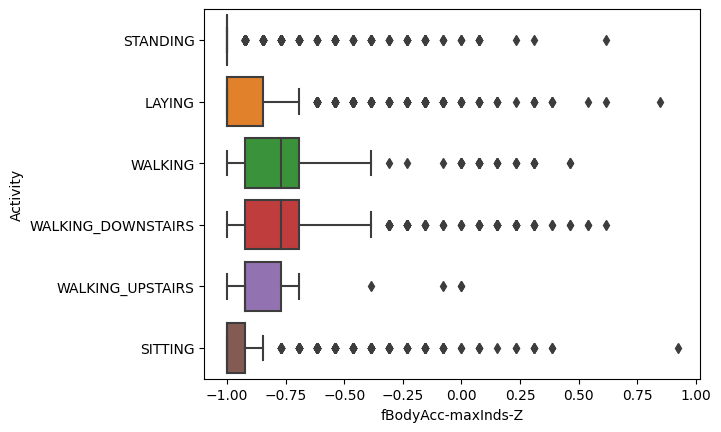

In [ ]:
f_name = importance_sort.iloc[-1][0]
sns.boxplot(x=data[f_name], y=data['Activity'])
plt.show()

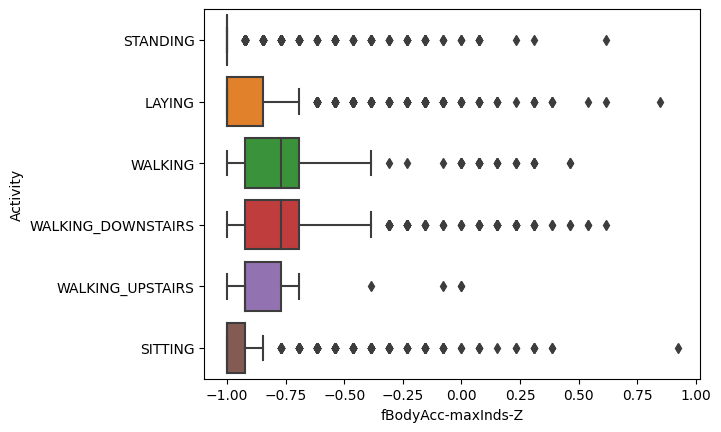

In [ ]:
# 하위 1위 feature_name에 대한 BoxPlot 그래프 그리기
## f_name 변수를 생성하여 하위 1위 feature의 컬럼명을 할당해 줍니다.
## sns.boxplot를 사용하여 data 데이터 프레임의 데이터 분포를 시각화 합니다.
## 파라미터: x=f_name, y='Activity', data=data

f_name = 'fBodyAcc-maxInds-Z'
sns.boxplot(x=data[f_name], y=data['Activity'])
plt.show()


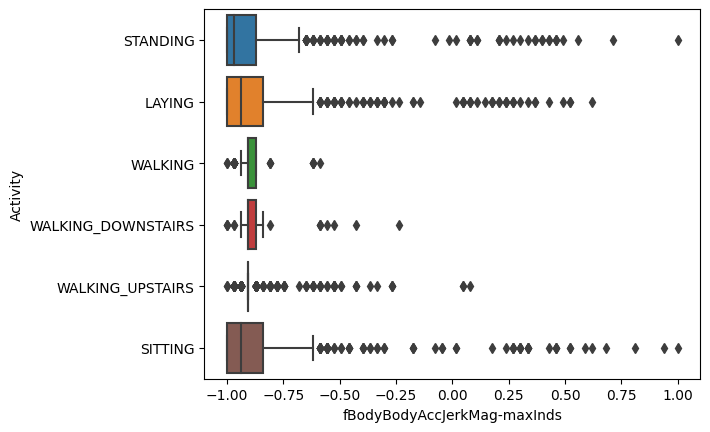

In [ ]:
f_name = importance_sort.iloc[-2][0]
sns.boxplot(x=data[f_name], y=data['Activity'])
plt.show()

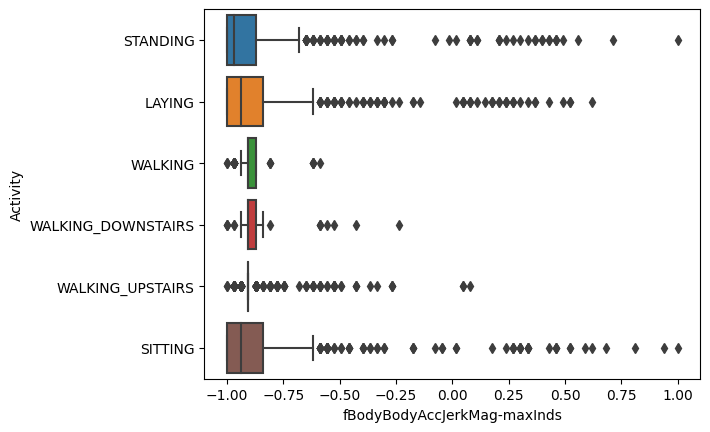

In [ ]:
# 하위 2위 feature_name에 대한 BoxPlot 그래프 그리기
## f_name 변수를 생성하여 하위 2위 feature의 컬럼명을 할당해 줍니다.
## sns.boxplot를 사용하여 data 데이터 프레임의 데이터 분포를 시각화 합니다.
## 파라미터: x=f_name, y='Activity', data=data

f_name = 'fBodyBodyAccJerkMag-maxInds'
sns.boxplot(x=data[f_name], y=data['Activity'])
plt.show()



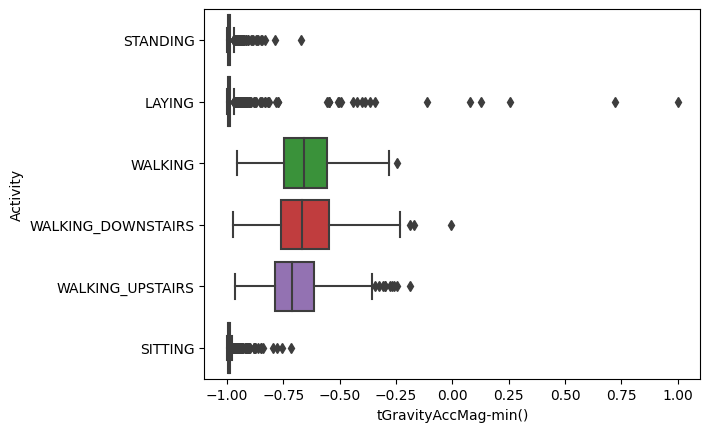

In [ ]:
f_name = importance_sort.iloc[-3][0]
sns.boxplot(x=data[f_name], y=data['Activity'])
plt.show()

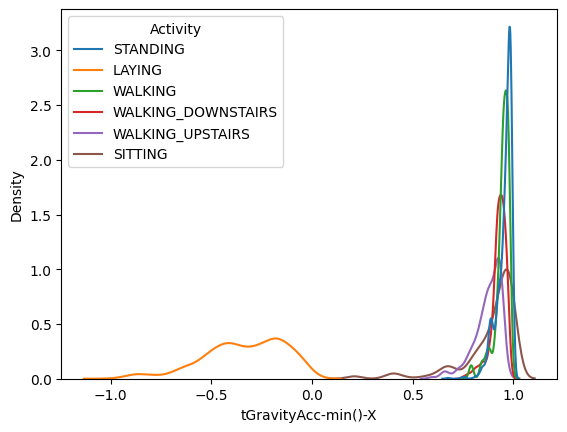

In [ ]:
f_name = 'tGravityAcc-min()-X'
sns.kdeplot(x=f_name, hue=target, data=data)
plt.show()

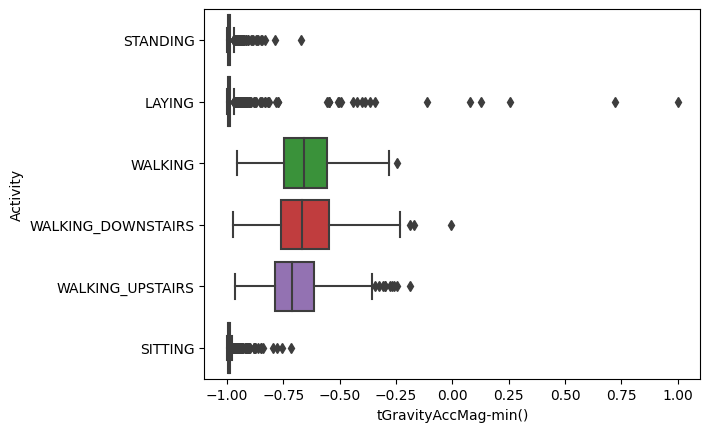

In [ ]:
# 하위 3위 feature_name에 대한 BoxPlot 그래프 그리기
## f_name 변수를 생성하여 하위 3위 feature의 컬럼명을 할당해 줍니다.
## sns.boxplot를 사용하여 data 데이터 프레임의 데이터 분포를 시각화 합니다.
## 파라미터: x=f_name, y='Activity', data=data

f_name = 'tGravityAccMag-min()'
sns.boxplot(x=data[f_name], y=data['Activity'])
plt.show()



---
---


#### <도전미션> 시각화 한번에 하기


* 중요도 히스토그램을 그리는 것은 반복되는 작업 입니다.
* for 문을 사용하여 코드 한 셀에 하위 3개의 차트가 한번에 그려질 수 있도록 코드를 작성해 보세요.
* 차트를 표시할때 순서를 꼭 지켜 주세요.(하위1(상), 하위2(중), 하위3(하))


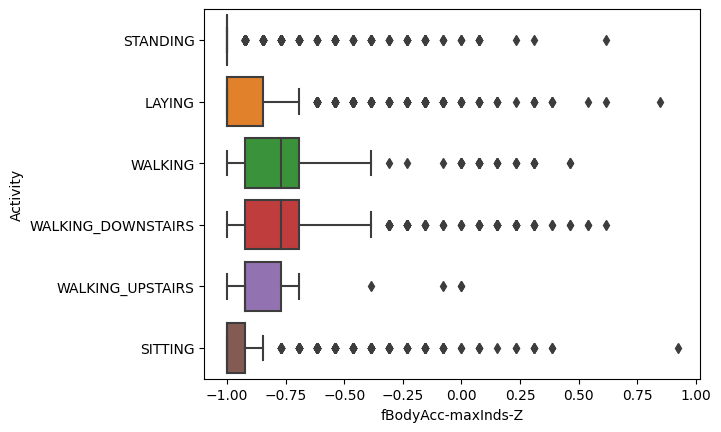

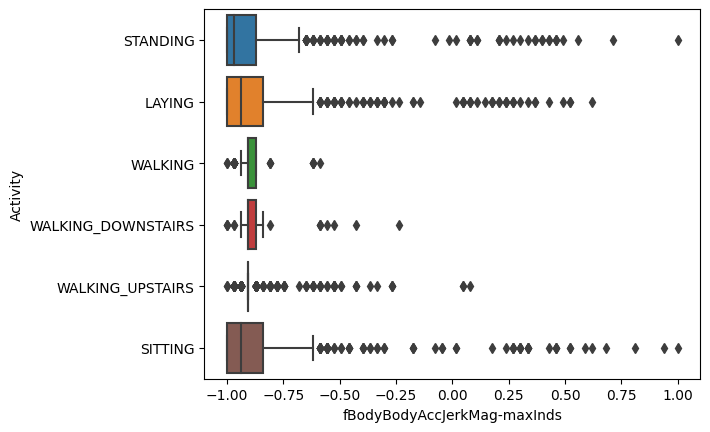

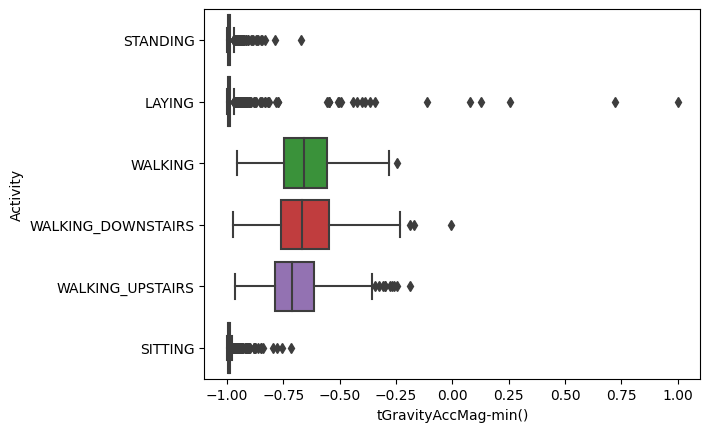

In [ ]:
# 하위 3개의 BoxPlot 그래프 시각화
## for 문을 이용하여 하위 3개의 feature에 대한 BoxPlot 차트들을 한 번에 시각화 합니다.
## 그래프의 위치는 하위1(상), 하위2(중), 하위3(하) 순서로 표시 합니다.

for i in range(1,3+1):
    f_name = importance_sort.iloc[-i][0]
    sns.boxplot(x=data[f_name], y=data['Activity'])
    plt.show()


---
---

### [미션5] 각 센서의 중요도 분석
* features.csv 파일에는 train_data.csv 파일의 feature 정보가 담겨져 있습니다.
* 각각의 feature는 sensor -> agg -> axis 순서로 계층구조로 이루어져 있어 feature명을 그룹으로 묶을 수 있습니다.
* feature 데이터와 importance_sort 데이터를 merge 하고 sensor 별 하위 계층을 그룹으로 묶어 중요도를 수평 그래프로 나타내세요.

	- 실습순서: features.csv 불러오기 -> 데이터 프레임 확인 -> 데이터 merge -> 데이터 그룹화 -> sensor 중요도 재정렬 -> 센서별 중요도 시각화(수평막대 그래프)

In [ ]:
# features.csv 파일 불러오기
## 'data'폴더에서 features.csv 파일을 읽어와 feature_group 변수에 할당 하세요.
## 변수에 할당이 잘 되었는지 확인해 주세요.

feature_group = pd.read_csv('features.csv')
feature_group

,sensor,agg,axis,feature_name
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z
3,tBodyAcc,std(),X,tBodyAcc-std()-X
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y
...,...,...,...,...
556,angle,tBodyGyroMean,gravityMean,"angle(tBodyGyroMean,gravityMean)"
557,angle,tBodyGyroJerkMean,gravityMean,"angle(tBodyGyroJerkMean,gravityMean)"
558,angle,X,gravityMean,"angle(X,gravityMean)"
559,angle,Y,gravityMean,"angle(Y,gravityMean)"


In [ ]:
# importance_sort 데이터 프레임 확인
# importance_sort 데이터프레임 사용전 데이터를 다시한번 확인 합니다.

importance_sort

,feature_name,feature_importance
0,tGravityAcc-min()-X,0.032845
1,tGravityAcc-max()-X,0.031726
2,tGravityAcc-energy()-X,0.030540
3,tGravityAcc-mean()-Y,0.027550
4,"angle(Y,gravityMean)",0.027023
...,...,...
556,fBodyAccMag-min(),0.000095
557,"fBodyAcc-bandsEnergy()-57,64",0.000094
558,tGravityAccMag-min(),0.000081
559,fBodyBodyAccJerkMag-maxInds,0.000074


In [ ]:
# 데이터프레임 merge
## merge_df 변수를 데이터프레임 타입으로 생성 및 초기화 합니다.
## feature_group 변수와 importance_sort 변수를 merge 하여 merge_df 변수에 할당 합니다
## 데이터가 잘 할당 되었나 merge_df 데이터를 확인 합니다.

merge_df = pd.DataFrame()
merge_df = pd.merge(feature_group, importance_sort)
merge_df

,sensor,agg,axis,feature_name,feature_importance
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000372
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000443
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z,0.000226
3,tBodyAcc,std(),X,tBodyAcc-std()-X,0.008804
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y,0.000660
...,...,...,...,...,...
556,angle,tBodyGyroMean,gravityMean,"angle(tBodyGyroMean,gravityMean)",0.000501
557,angle,tBodyGyroJerkMean,gravityMean,"angle(tBodyGyroJerkMean,gravityMean)",0.000505
558,angle,X,gravityMean,"angle(X,gravityMean)",0.024125
559,angle,Y,gravityMean,"angle(Y,gravityMean)",0.027023


In [ ]:
# 데이터 그룹화
## merge_df 변수를 'sensor' 기준으로 그룹화 하고,
## 'feature_importance' 열의 데이터를 같은 'sensor' 그룹끼리 더해 줍니다.
## groupby 함수는 데이터프레임을 그룹으로 묶으면서 필요한 덧셈을 동시에 수행할 수 있습니다.'
## 그룹화 및 덧셈을 수행한 결과를 sensor_sum 변수에 할당해 주세요.
## [TIP] 변수.groupby(by='그룹기준열')['연산 할 열'].연산메서드()


sensor_sum = merge_df.groupby('sensor',as_index=False)['feature_importance'].sum()
# 인덱스 살리나?

sensor_sum

,sensor,feature_importance
0,angle,0.063230
1,fBodyAcc,0.071299
2,fBodyAccJerk,0.105466
3,fBodyAccMag,0.045697
4,fBodyBodyAccJerkMag,0.011106
5,fBodyBodyGyroJerkMag,0.003777
6,fBodyBodyGyroMag,0.005638
7,fBodyGyro,0.074510
8,tBodyAcc,0.039238
9,tBodyAccJerk,0.074434


In [ ]:
# sensor 중요도 재정렬
## sensor_sum 데이터를 내림차순으로 정렬 후 sensor_sort 변수에 할당합니다.
## sensor_sum 변수를 데이터프레임으로 생성했을 경우 기준(by=)을 지정해 주어야 합니다.

sensor_sort = sensor_sum.sort_values('feature_importance',ascending=False)
sensor_sort


,sensor,feature_importance
16,tGravityAcc,0.347147
2,fBodyAccJerk,0.105466
7,fBodyGyro,0.074510
9,tBodyAccJerk,0.074434
1,fBodyAcc,0.071299
0,angle,0.063230
3,fBodyAccMag,0.045697
8,tBodyAcc,0.039238
13,tBodyGyroJerk,0.033359
17,tGravityAccMag,0.033098


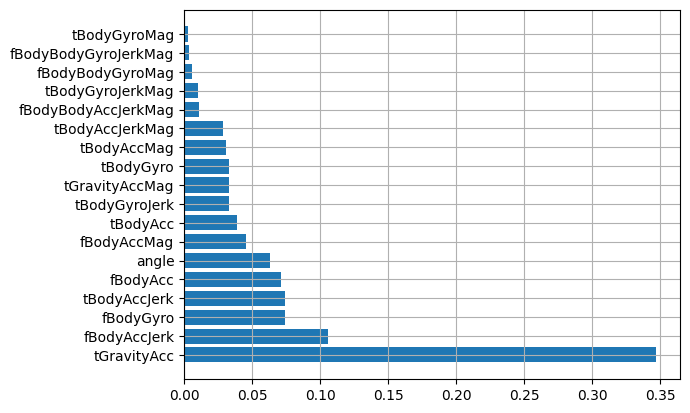

In [ ]:
# 센서별 중요도 시각화
# sensor 별 중요도를 수평막대 그래프로 시각화 합니다.
# matploltlib를 사용하여 sensor 별 중요도를 수평막대 그래프로 시각화 합니다.



plt.barh(y=sensor_sort['sensor'], width=sensor_sort['feature_importance'])
plt.grid()
plt.show()



---
---

#### <도전미션1> sensor 별 중요도 시각화

* seaborn 라이브러리를 사용하여 sensor 별 중요도를 시각화 해보고 matplotlib 라이브러리와 차이점을 비교해 보세요.

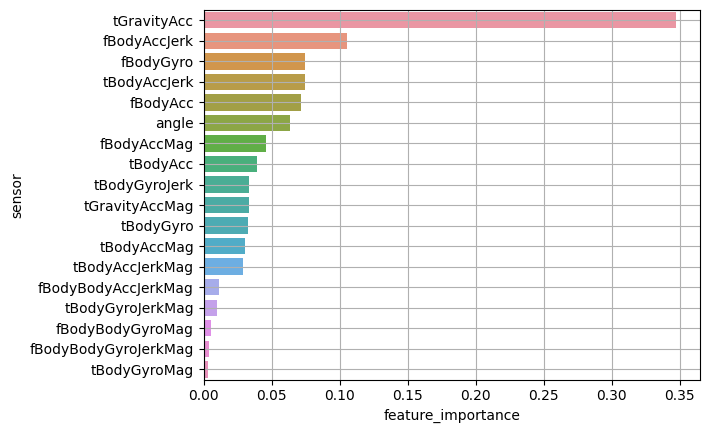

In [ ]:
# seaborn 라이브러리 사용 sensor 별 중요도 시각화
## seaborn 라이브러리를 사용하여 sensor 별 중요도를 시각화 해보세요.

sns.barplot(x=sensor_sort['feature_importance'],y=sensor_sort['sensor'])
plt.grid()
plt.show()



----------
----------

#### <도전미션2> sensor_agg 별 상위 20 중요도 시각화

* 데이터에는 너무나 많은 agg 가 있습니다. 어떤 sensor의 어떤 agg 가 가장 중요한 영향을 미치는지 중요도 Top 20 개의 agg 를 선별하여 시각화 하세요.

	- 실습순서: 데이터 그룹화 -> sensor_agg 중요도 재정렬 ->> Top20 센서 중요도 시각화

In [ ]:
# 데이터 그룹화
## merge_df 변수를 ['sensor','agg'] 기준으로 그룹화 하고 'feature_importance' 열의 데이터를 같은 그룹끼리 더해 sensor_agg_sum 변수에 할당 합니다.
## groupby 함수는 데이터프레임을 그룹으로 묶으면서 필요한 계산을 동시에 수행할 수 있습니다.


sensor_agg_sum = merge_df.groupby(['sensor','agg'])['feature_importance'].sum()
sensor_agg_sum



sensor          agg             
angle           X                   0.024125
                Y                   0.027023
                Z                   0.010859
                tBodyAccJerkMean    0.000101
                tBodyAccMean        0.000116
                                      ...   
tGravityAccMag  max()               0.000978
                mean()              0.001474
                min()               0.000081
                sma()               0.000551
                std()               0.013211
Name: feature_importance, Length: 221, dtype: float64

In [ ]:
# sensor_agg 중요도 재정렬
## sensor_agg_sum 데이터를 내림차순으로 정렬 후 sensor_agg_sort 변수에 할당합니다.


sensor_agg_sort = sensor_agg_sum.sort_values(ascending=False)
sensor_agg_sort


sensor               agg             
tGravityAcc          arCoeff()           0.084294
                     min()               0.067089
                     max()               0.062890
                     mean()              0.055343
                     energy()            0.050851
                                           ...   
angle                tBodyAccJerkMean    0.000101
fBodyBodyGyroMag     mean()              0.000096
fBodyAccMag          min()               0.000095
tGravityAccMag       min()               0.000081
fBodyBodyAccJerkMag  maxInds             0.000074
Name: feature_importance, Length: 221, dtype: float64

In [ ]:
sensor_agg_sort.head(20)

sensor          agg          
tGravityAcc     arCoeff()        0.084294
                min()            0.067089
                max()            0.062890
                mean()           0.055343
                energy()         0.050851
fBodyAccJerk    bandsEnergy()    0.039955
fBodyGyro       bandsEnergy()    0.034353
fBodyAcc        bandsEnergy()    0.028602
angle           Y                0.027023
                X                0.024125
tBodyAccJerk    mad()            0.015831
                std()            0.013524
tGravityAccMag  std()            0.013211
fBodyAccMag     std()            0.013009
fBodyAccJerk    sma()            0.012678
                energy()         0.012667
fBodyAccMag     energy()         0.012024
tGravityAcc     entropy()        0.010929
tBodyAccJerk    iqr()            0.010926
angle           Z                0.010859
Name: feature_importance, dtype: float64

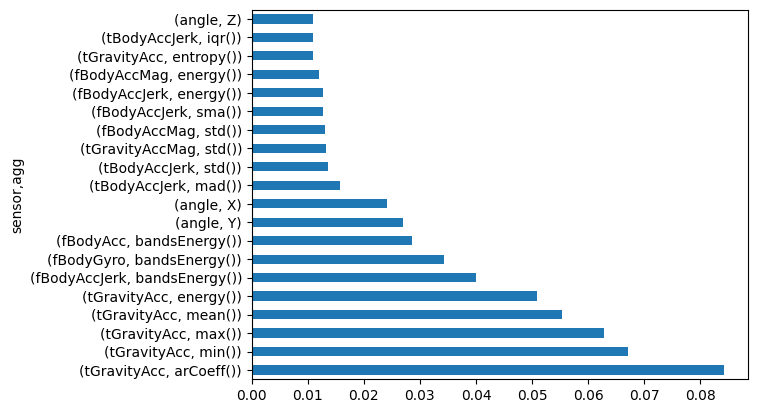

In [ ]:
# Top20 센서 중요도 시각화
## 중요도가 높은 센서 20개의 중요도를 수평 막대그래프로 시각화 합니다.
## [HINT] Pandas의 plot 함수를 사용

sensor_agg_sort.head(20).plot(kind='barh')
plt.show()

----------
----------

#### <도전미션3> sensor 별 agg 중요도 누적 그래프 시각화

* 행동을 예측하는데 센서별로 중요도가 다르듯이 각 센서별로 agg의 중요도가 다를 수 있습니다.
* 행동예측에 가장 중요한 센서를 수평 막대 그래프로 표시하고, 각 막대는 센서를 이루는 agg가 누적되어 보이도록 표시해 보세요

	- 실습순서: 데이터 재 구조화 -> 센서별 합계 재정렬 -> 정렬 기준열 제거 -> 누적 막대 그래프 시각화

In [ ]:
# sensor_agg_sort 데이터 재 구조화
# sensor_agg_sort 데이터셋의 'agg'열의 고유값들을 sensor_agg_sort 데이터셋의 컬럼으로 변환(재구조화) 합니다.
# 재구조화 한 데이터를 acc 변수에 할당 합니다.
# 참고함수: unstack()

acc = sensor_agg_sort.unstack()
acc



agg,X,Y,Z,arCoeff(),arCoeff()1,arCoeff()2,arCoeff()3,arCoeff()4,bandsEnergy(),correlation(),...,mean(),meanFreq(),min(),skewness(),sma(),std(),tBodyAccJerkMean,tBodyAccMean,tBodyGyroJerkMean,tBodyGyroMean
sensor,,,,,,,,,,,,,,,,,,,,,
angle,0.024125,0.027023,0.010859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000101,0.000116,0.000505,0.000501
fBodyAcc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028602,NaN,...,0.002100,0.002624,0.000707,0.004052,0.000696,0.004316,NaN,NaN,NaN,NaN
fBodyAccJerk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039955,NaN,...,0.007326,0.000847,0.000321,0.000689,0.012678,0.003409,NaN,NaN,NaN,NaN
fBodyAccMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005400,0.000579,0.000095,0.000227,0.001889,0.013009,NaN,NaN,NaN,NaN
fBodyBodyAccJerkMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000345,0.000152,0.000131,0.000529,0.000265,0.001272,NaN,NaN,NaN,NaN
fBodyBodyGyroJerkMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000163,0.000191,0.000165,0.000370,0.000304,0.000498,NaN,NaN,NaN,NaN
fBodyBodyGyroMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000096,0.001832,0.000401,0.000200,0.000426,0.000193,NaN,NaN,NaN,NaN
fBodyGyro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034353,NaN,...,0.002321,0.005375,0.000919,0.002584,0.002380,0.002537,NaN,NaN,NaN,NaN
tBodyAcc,NaN,NaN,NaN,0.002663,NaN,NaN,NaN,NaN,NaN,0.008541,...,0.001041,NaN,0.000942,NaN,0.000264,0.009772,NaN,NaN,NaN,NaN


In [ ]:
# 센서별 합계 재정렬
## acc 데이터의 각 센서의 행 방향으로(axis=1) 모든 값을 더해서 acc['sort'] 에 할당 합니다.
## 할당 후 acc 데이터를 acc['sort'] 열의 값 기준으로 내림차순으로 정렬 합니다.
## 정렬 후 데이터를 확인 합니다.


acc['sort'] = acc.sum(axis=1)
acc.sort_values('sort',ascending=False,inplace=True)
acc



agg,X,Y,Z,arCoeff(),arCoeff()1,arCoeff()2,arCoeff()3,arCoeff()4,bandsEnergy(),correlation(),...,meanFreq(),min(),skewness(),sma(),std(),tBodyAccJerkMean,tBodyAccMean,tBodyGyroJerkMean,tBodyGyroMean,sort
sensor,,,,,,,,,,,,,,,,,,,,,
tGravityAcc,NaN,NaN,NaN,0.084294,NaN,NaN,NaN,NaN,NaN,0.005041,...,NaN,0.067089,NaN,0.004356,0.002485,NaN,NaN,NaN,NaN,0.347147
fBodyAccJerk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039955,NaN,...,0.000847,0.000321,0.000689,0.012678,0.003409,NaN,NaN,NaN,NaN,0.105466
fBodyGyro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034353,NaN,...,0.005375,0.000919,0.002584,0.002380,0.002537,NaN,NaN,NaN,NaN,0.074510
tBodyAccJerk,NaN,NaN,NaN,0.002948,NaN,NaN,NaN,NaN,NaN,0.001909,...,NaN,0.000938,NaN,0.004376,0.013524,NaN,NaN,NaN,NaN,0.074434
fBodyAcc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028602,NaN,...,0.002624,0.000707,0.004052,0.000696,0.004316,NaN,NaN,NaN,NaN,0.071299
angle,0.024125,0.027023,0.010859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000101,0.000116,0.000505,0.000501,0.063230
fBodyAccMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000579,0.000095,0.000227,0.001889,0.013009,NaN,NaN,NaN,NaN,0.045697
tBodyAcc,NaN,NaN,NaN,0.002663,NaN,NaN,NaN,NaN,NaN,0.008541,...,NaN,0.000942,NaN,0.000264,0.009772,NaN,NaN,NaN,NaN,0.039238
tBodyGyroJerk,NaN,NaN,NaN,0.005615,NaN,NaN,NaN,NaN,NaN,0.002141,...,NaN,0.001522,NaN,0.000501,0.002732,NaN,NaN,NaN,NaN,0.033359


In [ ]:
# 정렬 기준열 제거
# 센서별 정렬을 완료 했으므로 acc 변수에서 acc['sort']열을 삭제 합니다.

acc.drop('sort',axis=1,inplace=True)
acc



agg,X,Y,Z,arCoeff(),arCoeff()1,arCoeff()2,arCoeff()3,arCoeff()4,bandsEnergy(),correlation(),...,mean(),meanFreq(),min(),skewness(),sma(),std(),tBodyAccJerkMean,tBodyAccMean,tBodyGyroJerkMean,tBodyGyroMean
sensor,,,,,,,,,,,,,,,,,,,,,
tGravityAcc,NaN,NaN,NaN,0.084294,NaN,NaN,NaN,NaN,NaN,0.005041,...,0.055343,NaN,0.067089,NaN,0.004356,0.002485,NaN,NaN,NaN,NaN
fBodyAccJerk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039955,NaN,...,0.007326,0.000847,0.000321,0.000689,0.012678,0.003409,NaN,NaN,NaN,NaN
fBodyGyro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034353,NaN,...,0.002321,0.005375,0.000919,0.002584,0.002380,0.002537,NaN,NaN,NaN,NaN
tBodyAccJerk,NaN,NaN,NaN,0.002948,NaN,NaN,NaN,NaN,NaN,0.001909,...,0.000470,NaN,0.000938,NaN,0.004376,0.013524,NaN,NaN,NaN,NaN
fBodyAcc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028602,NaN,...,0.002100,0.002624,0.000707,0.004052,0.000696,0.004316,NaN,NaN,NaN,NaN
angle,0.024125,0.027023,0.010859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000101,0.000116,0.000505,0.000501
fBodyAccMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005400,0.000579,0.000095,0.000227,0.001889,0.013009,NaN,NaN,NaN,NaN
tBodyAcc,NaN,NaN,NaN,0.002663,NaN,NaN,NaN,NaN,NaN,0.008541,...,0.001041,NaN,0.000942,NaN,0.000264,0.009772,NaN,NaN,NaN,NaN
tBodyGyroJerk,NaN,NaN,NaN,0.005615,NaN,NaN,NaN,NaN,NaN,0.002141,...,0.000831,NaN,0.001522,NaN,0.000501,0.002732,NaN,NaN,NaN,NaN


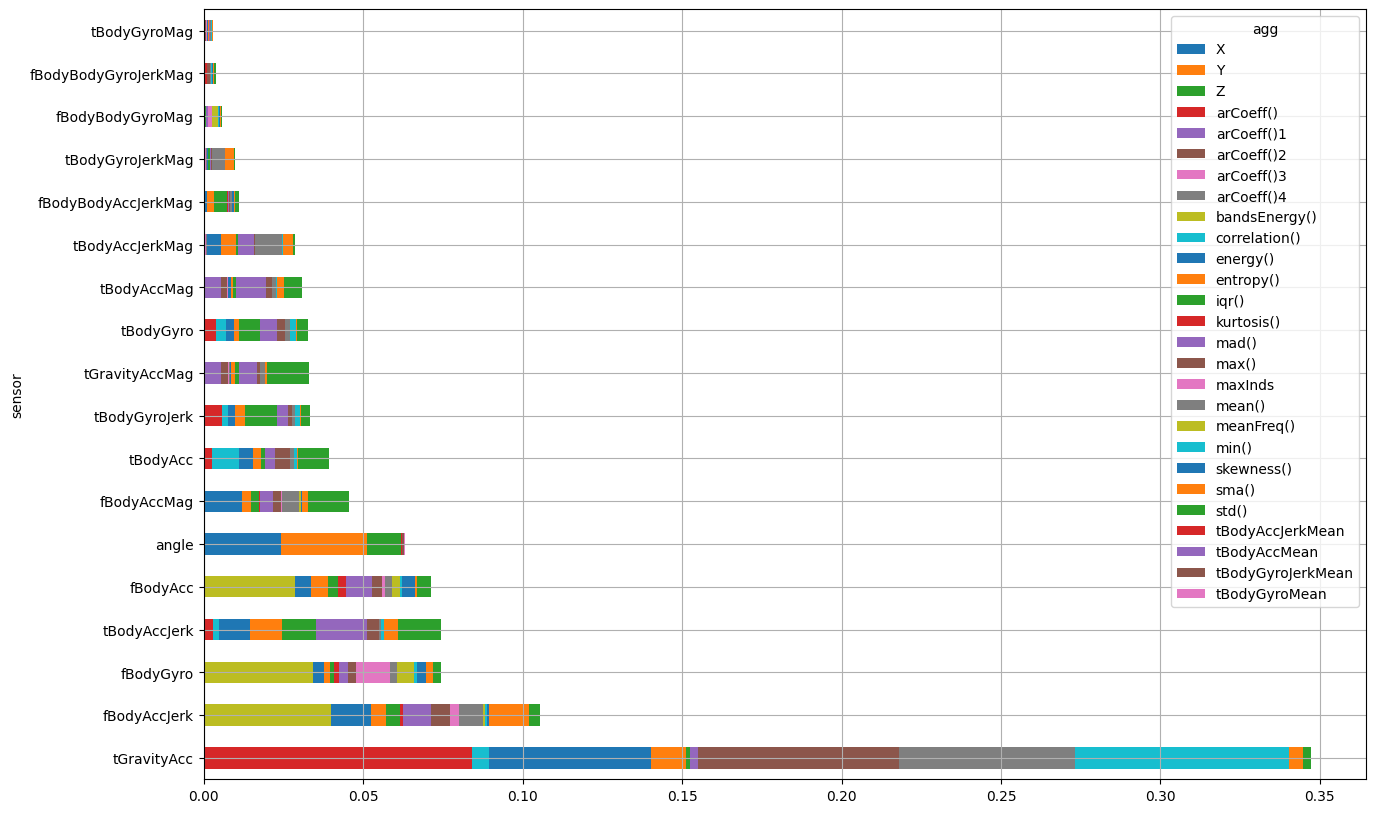

In [ ]:
# 누적 막대 그래프 시각화
# acc 변수를 sensor 별 수평 그래프로 시각화 합니다.

acc.plot(kind='barh', stacked='sensor', figsize=(15,10))
plt.grid()
plt.show()




---
---

## 수고하셨습니다

----------